#Regressão Logística

Referências

https://www.oreilly.com/library/view/python-artificial-intelligence/9781789539462/assets/462dc4fa-fd62-4539-8599-ac80a441382c.png

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a

https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python

https://www.kaggle.com/tags/binary-classification

##Exemplo 1 - Iris dataset

In [ ]:
import numpy as np
import pandas as pd;
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression

####Carregando Dados

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
data_iris = load_iris()
print(data_iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

#####Pré-processamento
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica

In [ ]:
# X (attribute information)
X = data_iris.data

# y (class {0,1,2})
y = data_iris.target

In [ ]:
X.shape, y.shape

((150, 4), (150,))

Criando Dataframe para armazenar os dados

In [ ]:
# Features
df_iris = pd.DataFrame(X, columns = data_iris.feature_names)

# Class
df_iris['SPECIES'] = y

In [ ]:
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),SPECIES
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


**Análise exploratória...**

    -- Verificar, por exemplo, se há outliers...


In [ ]:
df_iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),SPECIES
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
df_iris_corr = df_iris[ df_iris.columns[:4] ].corr()
df_iris_corr

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


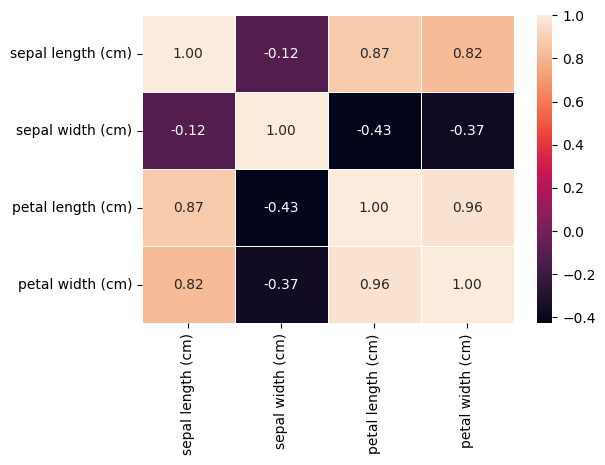

In [ ]:
f, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(df_iris_corr, annot=True, fmt=".2f", linewidths=.5, ax=ax);

**Gráfico de dispersão**

    -- Checar os mais e os menos correlacionados

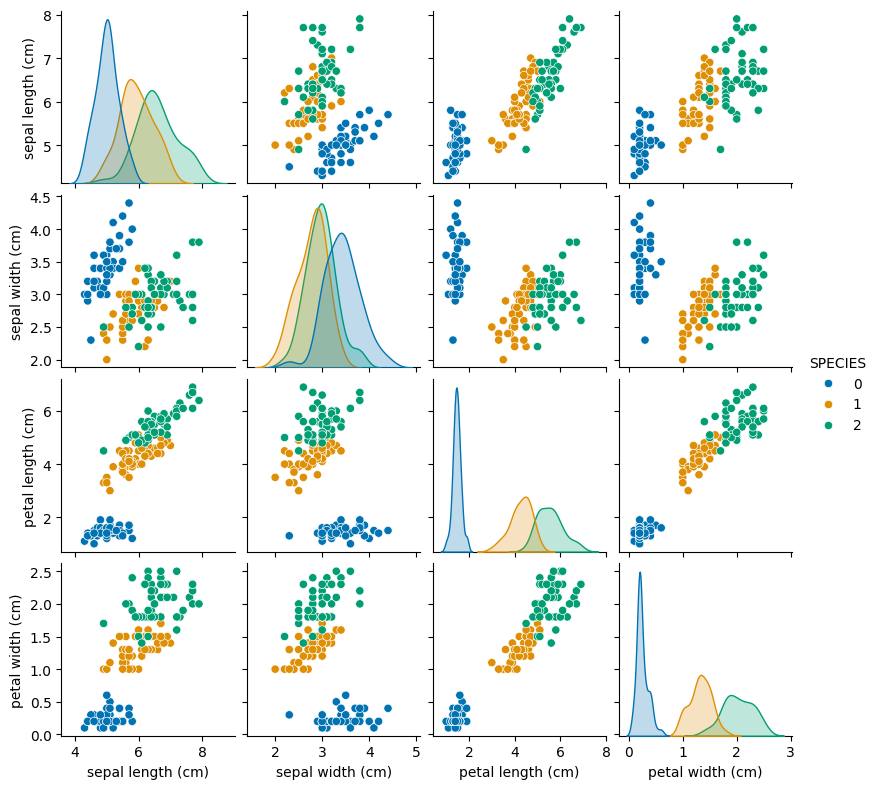

In [ ]:
sns.pairplot(df_iris, hue='SPECIES', height=2.0, palette='colorblind');

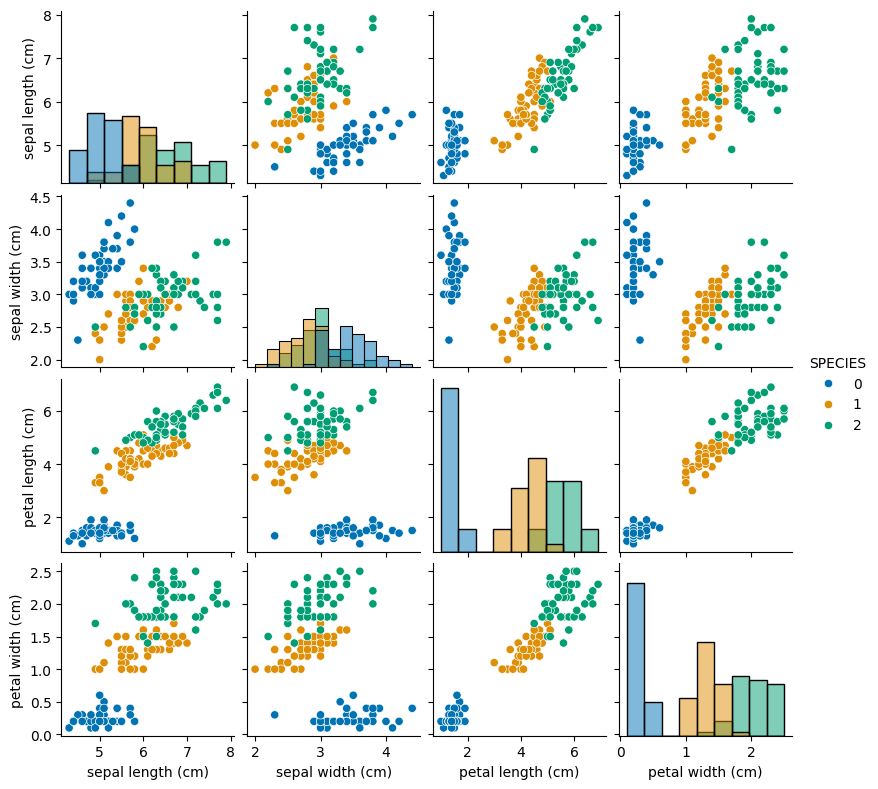

In [ ]:
# Se preferir, pode usar histograma na diagonal
sns.pairplot(df_iris, hue='SPECIES', height=2.0, palette='colorblind', diag_kind='hist');

### Calculando a regressão Logística

Treinando o classificador

    A função fit ajusta os parâmetros do classificador.

In [ ]:
?LogisticRegression

In [ ]:
LR = LogisticRegression()
#LR = LogisticRegression(max_iter=200)
LR.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)

X_scaled = scaler.transform(X)

LR2 = LogisticRegression()
LR2.fit(X_scaled, y)

LogisticRegression()

In [ ]:
LR.intercept_, LR.coef_

(array([  9.8405634 ,   2.21733979, -12.05790319]),
 array([[-0.41887908,  0.96710627, -2.52093331, -1.08419917],
        [ 0.53127466, -0.31479242, -0.20020997, -0.94850676],
        [-0.11239557, -0.65231386,  2.72114328,  2.03270593]]))

**Testando o classificador**

    A função `predict` recebe como entrada
    valores das características X e tenta
    predizer a classe mais provável.

In [ ]:
Xtest = np.array([[5.1, 3.5, 1.4, 0.2],
                  [7.0, 3.2, 4.7, 1.4],
                  [5.9, 3.0, 5.1, 1.8]])

LR.predict(Xtest)

array([0, 1, 2])

**Probabilidades das classes**

    A função `predict_proba` recebe como entrada os
    valores das características X e retorna
    a probabilidade de pertencer a cada classe.

In [ ]:
LR.predict_proba(Xtest)

array([[9.81799409e-01, 1.82005762e-02, 1.43509289e-08],
       [2.11770050e-03, 8.74346439e-01, 1.23535861e-01],
       [4.68932883e-04, 2.35009783e-01, 7.64521285e-01]])

**Avaliando o classificador**

    A função `score` recebe como entrada os valores das
    características X e dos valores corretos das saídas
    respectivas y, e retorna um score do classificador.

    Existem várias medidas para avaliar um classificador
    e estas serão vistas mais a frente.

In [ ]:
LR.score(X, y)

0.9733333333333334

---

## Hold-out (train/test split)

**Avaliando o classificador através de Holdout**

    A forma anteriormente utilizada para avaliar o classificador é
    inapropriada, pois os dados utilizados para treinar o classificador
    foram também utilizados para avaliá-lo. Não é possível saber se os
    resultados foram realmente bons ou ocorreu um overfitting.

    Uma maneira de evitar isso é separar os dados de treinanemto e teste.
    Desta forma, treina-se (FIT) o classificador com os dados de treinamento
    e avalia-se (ex: métrica score ou outra) com os dados de teste. Isto
    permite avaliar a generalização do classificador para dados novos, ou
    seja, avaliar o desempenho do classificador em dados que ele nunca viu.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [ ]:
X.shape, y.shape

((150, 4), (150,))

In [ ]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(105, 4) (105,) (45, 4) (45,)


In [ ]:
LR.fit(X_train, y_train)

LogisticRegression()

In [ ]:
LR.intercept_, LR.coef_

(array([  9.78648157,   1.63643199, -11.42291356]),
 array([[-0.49594265,  0.75976274, -2.24461257, -0.96725386],
        [ 0.62747032, -0.41334328, -0.28507312, -0.59598221],
        [-0.13152767, -0.34641946,  2.52968569,  1.56323607]]))

In [ ]:
LR.score(X_train, y_train)

0.9523809523809523

In [ ]:
LR.score(X_test, y_test)

0.9555555555555556

##Exemplo 2 - Breast Cancer dataset

In [ ]:
import numpy as np
import pandas as pd;
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression

####Carregando Dados

In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
data_bc = load_breast_cancer()
print(data_bc.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

#####Pré-processamento

In [ ]:
# X (attribute information)
X = data_bc.data

# y (class {0,1})
y = data_bc.target

In [ ]:
X.shape, y.shape

In [ ]:
#X,y

Criando Dataframe para armazenar os dados

In [ ]:
# Features
# Neste caso,, para simplificar, vamos utilizar apenas as 10 primeiras
df_bc = pd.DataFrame(X[:,:10], columns = data_bc.feature_names[:10])

# Class
df_bc['CLASS'] = y

In [ ]:
df_bc

**Análise exploratória...**

    -- Verificar, por exemplo, se há outliers..


In [ ]:
df_bc.describe()

In [ ]:
df_bc_corr = df_bc.iloc[:,:-1].corr()
df_bc_corr

In [ ]:
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(df_bc_corr, annot=True, fmt=".2f", linewidths=.5, ax=ax);

**Gráfico de dispersão**

    -- Checar os mais e os menos correlacionados

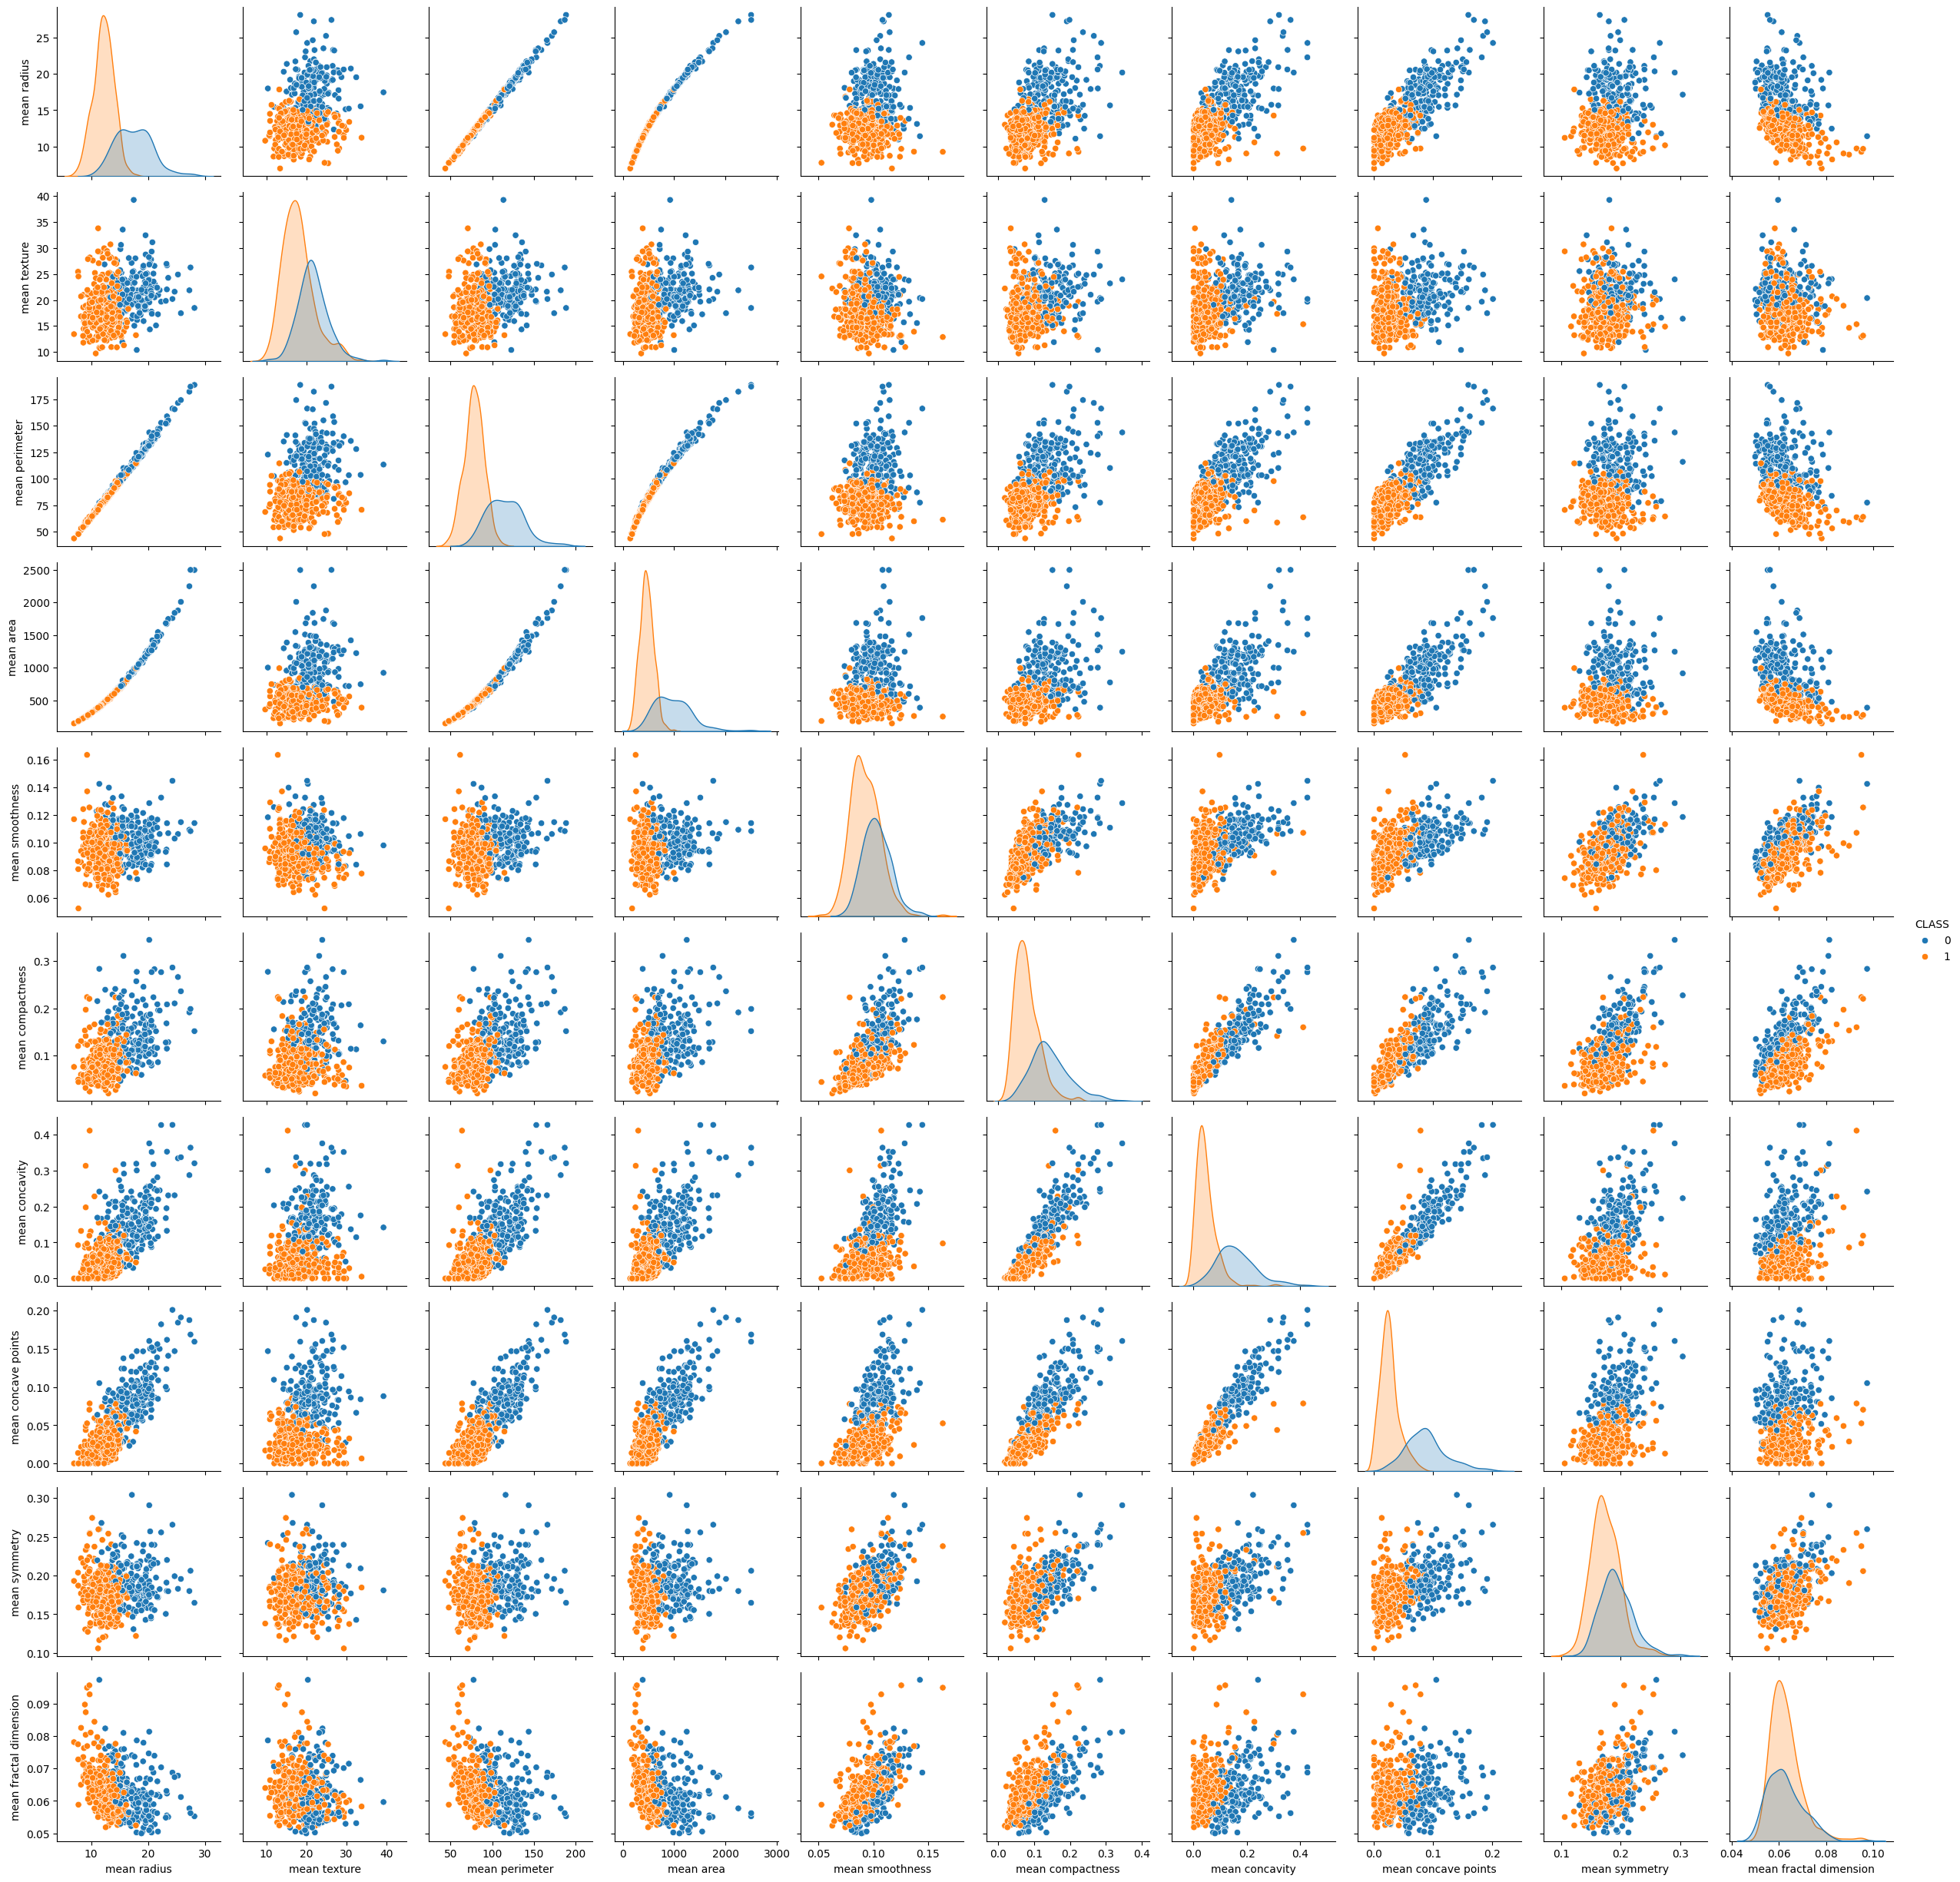

In [ ]:
sns.pairplot(df_bc, hue='CLASS', height=2.5);

### Calculando a regressão Logística

Treinando o classificador

    A função fit ajusta os parâmetros do classificador.

In [ ]:
X.shape

In [ ]:
LR2 = LogisticRegression(random_state=42)
LR2.fit(X[:, :10], y)

**Testando o classificador**

    A função `predict` recebe como entrada
    valores das características X e tenta
    predizer a classe mais provável.

In [ ]:
X[-3:, :10], y[-3:]

In [ ]:
Xtest = np.array([[2.060e+01, 2.933e+01, 1.401e+02, 1.265e+03, 1.178e-01, 2.770e-01,
         3.514e-01, 1.520e-01, 2.397e-01, 7.016e-02],
        [7.760e+00, 2.454e+01, 4.792e+01, 1.810e+02, 5.263e-02, 4.362e-02,
         0.000e+00, 0.000e+00, 1.587e-01, 5.884e-02],
         [1.660e+01, 2.808e+01, 1.083e+02, 8.581e+02, 8.455e-02, 1.023e-01,
         9.251e-02, 5.302e-02, 1.590e-01, 5.648e-02]])

LR2.predict(Xtest)

**Probabilidades das classes**

    A função `predict_proba` recebe como entrada os
    valores das características X e retorna
    a probabilidade de pertencer a cada classe.

In [ ]:
LR2.predict_proba(Xtest)

**Avaliando o classificador**

    A função `score` recebe como entrada os valores das
    características X e dos valores corretos das saídas
    respectivas y, e retorna um score do classificador.

    Existem várias medidas para avaliar um classificador
    e estas serão vistas mais a frente.

In [ ]:
LR2.score(X[:, :10], y)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(X[:,:10], y, test_size=0.2)

In [ ]:
X[:,:10].shape, y.shape

In [ ]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

In [ ]:
LR2 = LogisticRegression(max_iter=200)

In [ ]:
LR2.fit(X_train, y_train)

In [ ]:
LR2.intercept_, LR2.coef_

In [ ]:
LR2.score(X_train, y_train)

In [ ]:
LR2.score(X_test, y_test)

Referências

    https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

    https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

    https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a

    https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python

    https://www.kaggle.com/tags/binary-classification